In [1]:
import pandas as pd
import numpy as np
import json
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./new_movie_data/ratings.csv")
df

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [4]:
df.to_csv("./new_movie_data/recommender.tsv",sep="\t",header=False,index=False)

In [8]:
df_ = pd.read_csv("./new_movie_data/ratings_small.csv")
df_.to_csv("./new_movie_data/recommender_small.tsv",sep="\t",header=False,index=False)

## seeing credits file
has cast and crew details for each movie id. <br>
CAST has a list of dictionary about the character played by the name, id, gender etc. <br>
CREW has a list of dictionary about the directors, writer, production etc. with details about name, job, gender, department etc. 

In [9]:
df_credits = pd.read_csv("./new_movie_data/credits.csv")
df_credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [10]:
eval(df_credits.iloc[0,0])

[{'cast_id': 14,
  'character': 'Woody (voice)',
  'credit_id': '52fe4284c3a36847f8024f95',
  'gender': 2,
  'id': 31,
  'name': 'Tom Hanks',
  'order': 0,
  'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'},
 {'cast_id': 15,
  'character': 'Buzz Lightyear (voice)',
  'credit_id': '52fe4284c3a36847f8024f99',
  'gender': 2,
  'id': 12898,
  'name': 'Tim Allen',
  'order': 1,
  'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'},
 {'cast_id': 16,
  'character': 'Mr. Potato Head (voice)',
  'credit_id': '52fe4284c3a36847f8024f9d',
  'gender': 2,
  'id': 7167,
  'name': 'Don Rickles',
  'order': 2,
  'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'},
 {'cast_id': 17,
  'character': 'Slinky Dog (voice)',
  'credit_id': '52fe4284c3a36847f8024fa1',
  'gender': 2,
  'id': 12899,
  'name': 'Jim Varney',
  'order': 3,
  'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'},
 {'cast_id': 18,
  'character': 'Rex (voice)',
  'credit_id': '52fe4284c3a36847f8024fa5',
  'gender': 2,
  'id': 12900,
 

In [11]:
eval(df_credits.iloc[0,1])

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'gender': 2,
  'id': 7,
  'job': 'Screenplay',
  'name': 'Andrew Stanton',
  'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f5b',
  'department': 'Writing',
  'gender': 2,
  'id': 12892,
  'job': 'Screenplay',
  'name': 'Joel Cohen',
  'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f61',
  'department': 'Writing',
  'gender': 0,
  'id': 12893,
  'job': 'Screenplay',
  'name': 'Alec Sokolow',
  'profile_path': '/v79vlRYi94BZUQnkkyzn

## seeing keywords file
contains ids and keywords where the keywords is a list of ids and keyowrds that are related to the movie. 

In [12]:
df_keyword = pd.read_csv("./new_movie_data/keywords.csv")
df_keyword

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [16]:
eval(df_keyword["keywords"][0])

[{'id': 931, 'name': 'jealousy'},
 {'id': 4290, 'name': 'toy'},
 {'id': 5202, 'name': 'boy'},
 {'id': 6054, 'name': 'friendship'},
 {'id': 9713, 'name': 'friends'},
 {'id': 9823, 'name': 'rivalry'},
 {'id': 165503, 'name': 'boy next door'},
 {'id': 170722, 'name': 'new toy'},
 {'id': 187065, 'name': 'toy comes to life'}]

## seeing links file
contains imdb and tmdb id's with the movie_id (NOT THAT USEFUL FOR US IMO :) )

In [17]:
df_links = pd.read_csv("./new_movie_data/links.csv")
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
45838,176269,6209470,439050.0
45839,176271,2028550,111109.0
45840,176273,303758,67758.0
45841,176275,8536,227506.0


## seeing movie_metadata file
Contains general information about the movie like: <br>
1. Adult: bool - if the movie is adult or not
2. belongs_to_collection: dict - if the movie is from a colection of movies
3. budget: int - budget of the movie
4. genres: list of dict - contains ids and genres pair
5. homepage: link to the homepage if the movie has one (NOT USEFUL FOR US IMO)
6. id: movie_id
7. imdb_id: imdb_id - (NOT USEFUL FOR US)
8. original_language
9. original_title
10. overview - a text containing the summary about the movie (MIGHT BE VERY USEFUL NEED TO FIGURE OUT HOW??)
11. popularity - int value of the popularity of the movie
12. poster_path - NOT USEFUL FOR US
13. production_companies - list of dict with name and id
14. production_countries - list of dict with name and iso_3166_1
15. release date
16. revenue
17. runtime
18. spoken_languages - list of dict with name and iso_639_1
19. status - released or underway (MAYBE NOT THAT USEFUL)
20. tagline - if available the tagline of the movie
21. title - string of the title of the movie
22. video - bool if the video is present (NOT THAT USEFUL)
23. vote_average - average of the ratings from 10 max
24. vote_count - number of ratings

In [18]:
df_metadata = pd.read_csv("./new_movie_data/movies_metadata.csv",low_memory=False)
df_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [19]:
df_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [20]:
df_metadata.popularity.fillna(0).values

array(['21.946943', '17.015539', '11.7129', ..., '0.903007', '0.003503',
       '0.163015'], dtype=object)

In [21]:
df_metadata.production_companies[0]

"[{'name': 'Pixar Animation Studios', 'id': 3}]"

In [26]:
df_metadata.vote_count.values[0]

5415.0

In [32]:
df_useful_metadata_col = ['id','adult','belongs_to_collection','budget','genres','original_language'
                          , 'original_title','overview','popularity','production_companies',
                         'release_date','revenue','runtime','spoken_languages','status',
                         'tagline','title','vote_average','vote_count'] 
df_useful_metadata = df_metadata[df_useful_metadata_col]

In [33]:
df_useful_metadata

,id,adult,belongs_to_collection,budget,genres,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0
1,8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,31357,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,439050,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",fa,رگ خواب,Rising and falling between a man and woman.,0.072051,[],NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,4.0,1.0
45462,111109,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,9.0,3.0
45463,67758,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,3.8,6.0
45464,227506,False,NaN,0,[],en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]",1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,0.0,0.0


In [34]:
df_keyword.id = df_keyword.id.astype('string')

In [38]:
# df_useful = pd.merge(df_useful_metadata_,df_keyword,on="id")
df_useful = pd.merge(df_useful_metadata, df_keyword, on="id")

In [39]:
df_useful

,id,adult,belongs_to_collection,budget,genres,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,keywords
0,862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46477,439050,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",fa,رگ خواب,Rising and falling between a man and woman.,0.072051,[],NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,4.0,1.0,"[{'id': 10703, 'name': 'tragic love'}]"
46478,111109,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,9.0,3.0,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46479,67758,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,"[{'name': 'American World Pictures', 'id': 6165}]",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,3.8,6.0,[]
46480,227506,False,NaN,0,[],en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,"[{'name': 'Yermoliev', 'id': 88753}]",1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,0.0,0.0,[]


In [40]:
df_keyword.shape

(46419, 2)

In [41]:
df_metadata.iloc[0].id

'862'

In [42]:
df_credits.id = df_credits.id.astype('string')

In [43]:
df_useful_ = pd.merge(df_useful,df_credits,on="id")

In [44]:
df_useful_.columns

Index(['id', 'adult', 'belongs_to_collection', 'budget', 'genres',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'keywords', 'cast', 'crew'],
      dtype='object')

In [45]:
df_useful.to_csv("./new_movie_data/useful_movie_data.csv",index=False)

## Playing Around with the useful data

In [52]:
df_useful = pd.read_csv("./new_movie_data/useful_movie_data.csv")

In [53]:
df_useful.columns

Index(['id', 'adult', 'belongs_to_collection', 'budget', 'genres',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'keywords'],
      dtype='object')

In [54]:
not_useful = []

In [55]:
# status
Counter(df_useful.status)

Counter({'Released': 46022,
         'Rumored': 236,
         'Post Production': 100,
         nan: 86,
         'In Production': 21,
         'Planned': 15,
         'Canceled': 2})

In [56]:
# take only released movies and remove the rest
df_useful = df_useful[df_useful.status == 'Released']
Counter(df_useful.status)

Counter({'Released': 46022})

In [57]:
not_useful.append('status')
not_useful

['status']

In [60]:
# Only 8 adult movies - can remove this too ! not removed rn
np.unique(df_useful.adult,return_counts = True)

(array([False,  True]), array([46014,     8]))

In [61]:
# belongs to collection (only ~10% belong to a collection - but that data is useful)
df_useful.belongs_to_collection.count()*100/df_useful.shape[0]

9.847464256225283

In [62]:
df_useful.belongs_to_collection = [i if str(i) != "nan" else dict() for i in df_useful.belongs_to_collection]
sum(df_useful.belongs_to_collection == dict())*100/df_useful.shape[0]

90.15253574377472

In [79]:
# budget (only 20% of the movies have a budget and hence is just noisy BETTER TO REMOVE)
df_useful[df_useful.budget != 0].shape[0]*100/df_useful.shape[0]

19.525444352700884

In [67]:
not_useful.append('budget')
not_useful

['status', 'budget']

In [68]:
# genres ~95% have genres hence useful 
sum(df_useful.genres.values != '[]')*100/df_useful.shape[0]

94.64821172482726

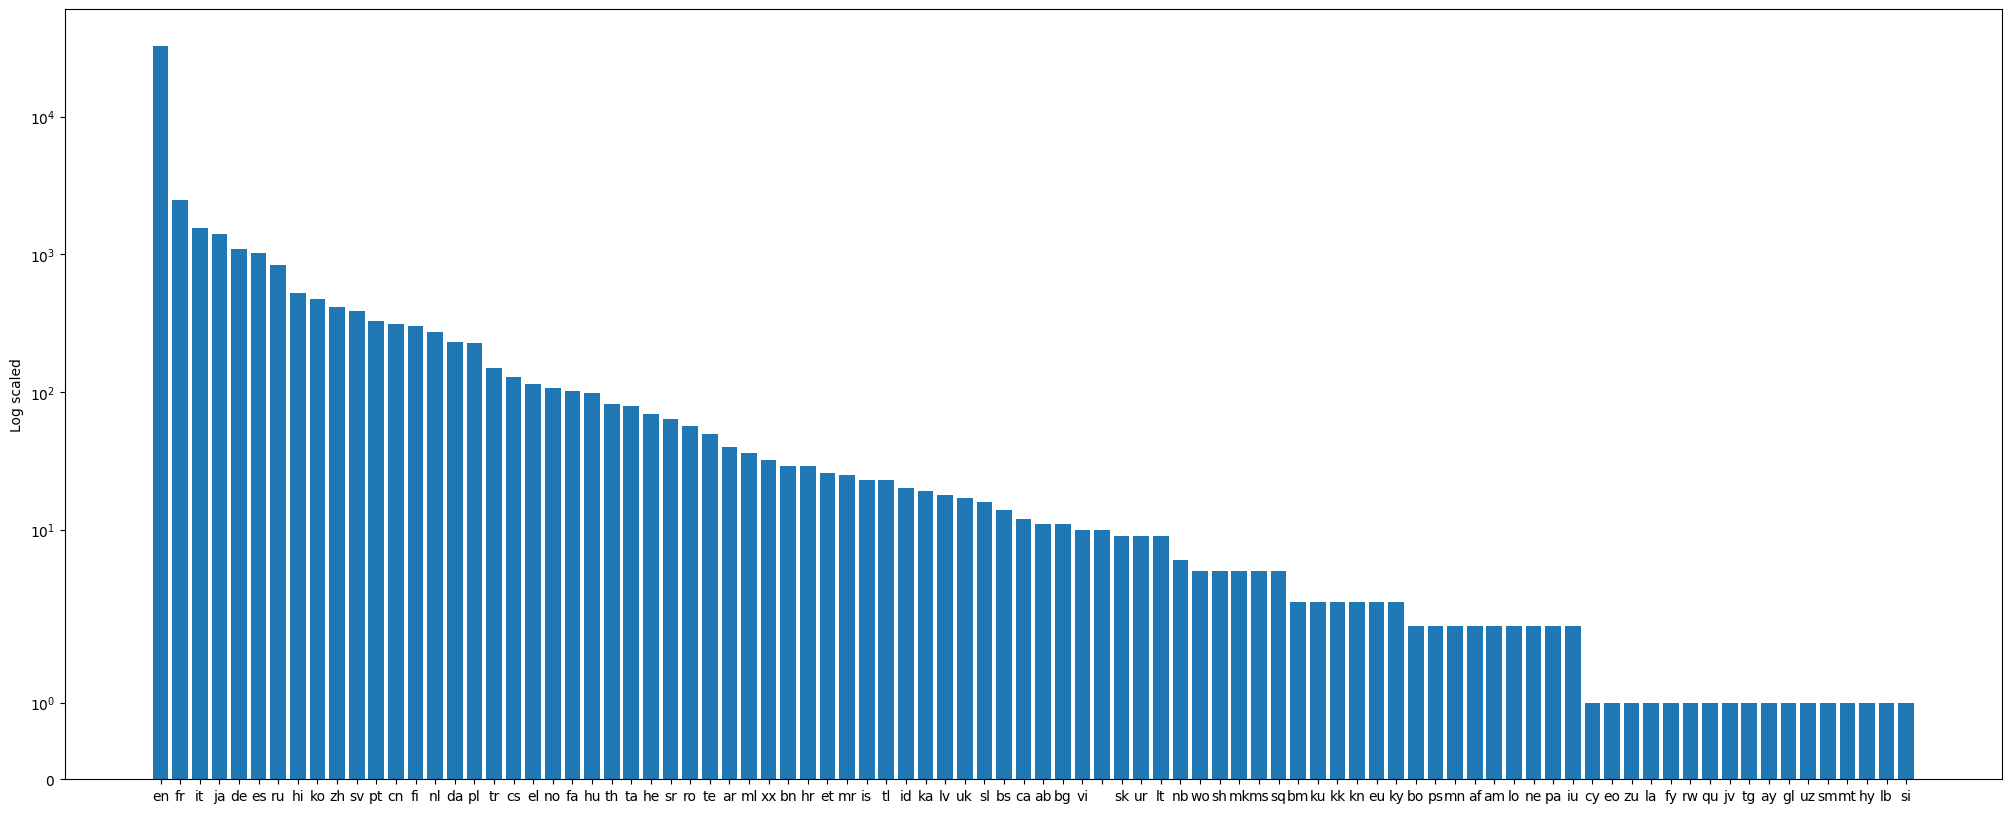

In [69]:
# original language spread - most movies in english 10 na values - replce "" 
df_useful.original_language = df_useful.original_language.fillna("")
plt.figure(figsize=(25, 10))
org_lang = dict(Counter(df_useful.original_language.values))
org_lang_sorted = dict(sorted(org_lang.items(),key=lambda item: item[1],reverse=True))
plt.bar([str(i) for i in org_lang_sorted.keys()],org_lang_sorted.values())
plt.yscale('symlog')
plt.ylabel("Log scaled")
plt.show()

In [70]:
# original titles - all have titles and ~86% of the titles are written in english language 
# CAN BE REMOVED ALREADY HAVE A TITLE so ORIGINAL TITLE DOESN'T MAKE MUCH SENSE (didn't remove rn)
sum([i.isascii() for i in df_useful.original_title.values]*100)/df_useful.shape[0]
# sum(df_useful.original_title.isna()) = 0

86.31524053713441

In [80]:
# overview ~2% don't have an overview, replace na with empty string
sum(df_useful.overview.isna())*100/df_useful.shape[0]
df_useful.overview = df_useful.overview.fillna("")

In [81]:
# popularity (0 to 548) almost all the songs have popularity which can be a useful measure and 4 na replaced with 0
# sum(df_useful.popularity == 0)*100/df_useful.shape[0] # = 0.1412367997914041
# sum(df_useful.popularity.isna())
df_useful.popularity = df_useful.popularity.fillna(0)

In [82]:
# production_companies ~73% have data about the production companies
df_useful = df_useful[df_useful.production_companies.notna()]
sum(df_useful.production_companies.values != '[]')*100/df_useful.shape[0]

73.93420538003564

In [83]:
# release_date ~ 78 na replaced with zero and set them just to the year
# sum(df_useful.release_date.isna())
df_useful.release_date = df_useful.release_date.fillna(0)
df_useful.release_date = [int(str(i).split("-")[0]) for i in df_useful.release_date.values]
# sum(df_useful.release_date.isna())

In [84]:
# revenue ~84% have 0 revenue and should be removed NOT USEFUL.
# df_useful.revenue = df_useful.revenue.fillna(0)
sum(df_useful.revenue == 0)*100/df_useful.shape[0]

83.73821215940202

In [85]:
not_useful.append('revenue')
not_useful

['status', 'budget', 'revenue']

In [86]:
# runtime - replace na with 0 only ~4% have 0 runtime
df_useful.runtime = df_useful.runtime.fillna(0)
sum(df_useful.runtime == 0)*100/df_useful.shape[0]

3.9546303941593153

In [87]:
# spoken_languages - replace 4 na with empty list and 91.5% have spoken languages which is good. 
sum(df_useful.spoken_languages.isna())
df_useful.spoken_languages.loc[df_useful.spoken_languages.isnull()].apply(lambda x: [])
# sum(df_useful.spoken_languages.isna())
sum(df_useful.spoken_languages.values != '[]')*100/df_useful.shape[0]

91.5866324801182

In [88]:
# tagline about 55% don't have a tagline better to remove
sum(df_useful.tagline.isna())*100/df_useful.shape[0]

55.20837860153839

In [89]:
not_useful.append('tagline')
not_useful

['status', 'budget', 'revenue', 'tagline']

In [90]:
# title - all have a title, useful!! and about ~98% in ascii
sum([i.isascii() for i in df_useful.title.values]*100)/df_useful.shape[0]

98.17261309808353

In [91]:
# vote average - no na values now, only 6% have 0 vote average which is good!
sum(df_useful.vote_average == 0)*100/df_useful.shape[0]

6.603363608708879

In [95]:
# vote count - no na values now ~93.6% have been voted atleast once
sum(df_useful.vote_count != 0)*100/df_useful.shape[0]

93.59219503715615

In [93]:
# keywords - no na values now, more than 68% have keywords so important 
sum(df_useful.keywords.values != '[]')*100/df_useful.shape[0]

68.38033983746904

In [96]:
not_useful

['status', 'budget', 'revenue', 'tagline']

In [97]:
[i for i in list(df_useful.columns) if i not in not_useful]

['id',
 'adult',
 'belongs_to_collection',
 'genres',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'release_date',
 'runtime',
 'spoken_languages',
 'title',
 'vote_average',
 'vote_count',
 'keywords']

In [98]:
df_useful_ = df_useful[[i for i in list(df_useful.columns) if i not in not_useful]]
df_useful_.columns

Index(['id', 'adult', 'belongs_to_collection', 'genres', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'runtime', 'spoken_languages', 'title', 'vote_average',
       'vote_count', 'keywords'],
      dtype='object')

In [99]:
# no na values either empty dict, empty list, 0 or ""
[sum(df_useful_.iloc[:,i].isna()) for i in range(df_useful_.columns.shape[0])]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [100]:
df_useful_.to_csv("./new_movie_data/cleaned_data.csv",index = False)